<a href="https://colab.research.google.com/github/FerrazThales/Deep-Learning/blob/main/Cat_and_NonCat_with_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que você vai aprender neste projeto:

* O que é uma Rede Neural e como construir uma simples.
* Como dados de imagens são armazenados.
* x


# Introdução a Redes Neurais
AI is the new eletricity. a little explanation about features and a draw of a neural network.

supervised learning , structured data and unstructured data

scales deep learning progress

In [1]:
#ignorar os warnings
import warnings
warnings.filterwarnings('ignore')

#importando as bibliotecas que serão utilizadas
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

#Obtenção dos dados

Estas bases de dados foram obtidas no [Kaggle](https://www.kaggle.com/muhammeddalkran/catvnoncat). De acordo com o autor, elas foram **disponibilizadas** como desafio de uma de suas aulas de **Introdução a Visão Computacional** na *Bilkent University*. As bases de dados vieram no formato `h5` e os dados já estavam **separados** em treino e teste.

Em resumo, estes registros trazem informações de **imagens** (64x64 pixels) que contém - ou não contém, gatos. Desta forma, as imagens que contém **gatos** estão rotuladas com o valor 1 e as que não contém estão **rotuladas** com o valor **zero**.

Caso os links dos datasets não estejam funcionando, você pode buscá-los em meu [Github](https://github.com/FerrazThales/Deep-Learning/tree/main/catvnoncat).


In [2]:
#guardando os endereços dos dados de treino e teste
train_data_path = "/content/train_catvnoncat.h5"
test_data_path = "/content/test_catvnoncat.h5"

#importando os dados de treino e teste
train_data = h5py.File(train_data_path,'r')
test_data = h5py.File(test_data_path,'r')

#armazenando as variáveis do treino
x_train = train_data['train_set_x']
y_train = train_data['train_set_y']

#armazenando as variáveis de teste
x_test = test_data['test_set_x']
y_test = test_data['test_set_y']

#Análise Exploratória dos Dados

texto texto texto

comentar do array (50,)

In [3]:
#visualizando o tipo de dado
type(x_train)

h5py._hl.dataset.Dataset

In [4]:
#avaliando a quantidade de valores para treino
print('Variavéis independentes de treino:', x_train.shape)
print('Variavéis dependentes de treino:', y_train.shape)

Variavéis independentes de treino: (209, 64, 64, 3)
Variavéis dependentes de treino: (209,)


In [5]:
#avaliando a quantidade de valores para teste
print('Variavéis independentes de teste:', x_test.shape)
print('Variavéis dependentes de teste:', y_test.shape)

Variavéis independentes de teste: (50, 64, 64, 3)
Variavéis dependentes de teste: (50,)


falar deste 50,

explicar o 64 x 64 e 3 , ver o type

<center><img src="https://www.researchgate.net/profile/Belal-Ayyoub/publication/339435251/figure/fig1/AS:861467612028928@1582401292006/Color-image-and-RGB-matrices.jpg"></center>

In [6]:
#observando os parâmetros da primeira imagem
x_train[0].shape

(64, 64, 3)

In [7]:
#analisando o primeiro registro
x_train[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

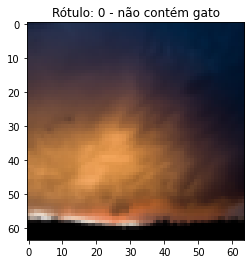

In [8]:
#visualizando a primeira imagem
plt.imshow(x_train[0]);
plt.title('Rótulo: {} - não contém gato'.format(y_train[0]));

imagem de um gato (1), comentar da régua

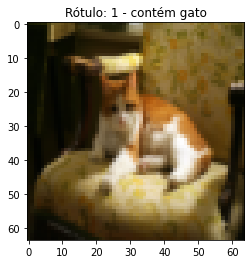

In [9]:
#exibindo a imagem de um gato da base de treino
plt.imshow(x_train[7])
plt.title('Rótulo: {} - contém gato'.format(y_train[7]));

#Ajustando os Dados

texto texto texto

falar do reshape
 64x64 x 3 = 12288 entradas, cada um representa um x

In [10]:
#transformando em um array da numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

pega quantas linhas vc quiser, mas eu quero com tantas colunas

In [11]:
#quantidade de dados de treino e teste
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

#fazendo o reshape dos x de treino e teste
x_train_reshaped = x_train.reshape(number_of_train,-1).T
x_test_reshaped = x_test.reshape(number_of_test,-1).T

#fazendo o reshape dos y de treino e teste
y_train_reshaped = y_train.reshape(number_of_train,-1).T
y_test_reshaped = y_test.reshape(number_of_test,-1).T

In [12]:
#avaliando a quantidade de valores para treino
print('Variavéis independentes de treino:', x_train_reshaped.shape)
print('Variavéis dependentes de treino:', y_train_reshaped.shape)

Variavéis independentes de treino: (12288, 209)
Variavéis dependentes de treino: (1, 209)


In [13]:
#avaliando a quantidade de valores para teste
print('Variavéis independentes de teste:', x_test_reshaped.shape)
print('Variavéis dependentes de teste:', y_test_reshaped.shape)

Variavéis independentes de teste: (12288, 50)
Variavéis dependentes de teste: (1, 50)


#Implementação da Regressão Logística para Classificação

texto texto 

[link](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

classificação supervisionada, binária

colocar uma equação


In [14]:
#função para inicializar os valores
def inicializar(x):
  """
    texto explicando a função

    dar uma atenção neste b
  """
  w = np.zeros((x.shape[0],1))
  b = 0.0
  return w,b

In [15]:
#inicializando os weights e o bias com zero
w,b = inicializar(x_train_reshaped)
print('Dimensões de w',w.shape)
print('Valor de b:',b)

Dimensões de w (12288, 1)
Valor de b: 0.0


falar de criar a função de ativação sigmoidal e falar que ela retorna a probabilidade

<center><img src="https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png"></center>

In [16]:
#função de ativação
def sigmoidal(z):
  return 1.0/(1.0+np.exp(-z))

## Forward Propagation - Left to Right

texto texto
<center><img src="https://lh5.googleusercontent.com/0h2x6KBGVF6sEkHA12kq-lrCGH9iX0_LEtphjCbb0A-WUQDqQwmjU0HvSzb3s_k-pe7tkAL1zC0MqfROHiCLnbogb5R2OVaD9FUX8tFEkYis8K8NlBq1SoBND3wM0oOCNQWFrtI" width="50%"></center>

In [17]:
#funcao da propagação da esquerda para a direita
def forward_propagation(w,b,x):
  z = np.dot(w.T,x) + b
  a = sigmoidal(z)
  return a

texto texto

In [18]:
#primeiros valores retornados após a aplicação na equação logística
a =  forward_propagation(w,b,x_train_reshaped)
print('Dimensões da matriz após passar pela função de ativação:',a.shape,'\n')
a

Dimensões da matriz após passar pela função de ativação: (1, 209) 



array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

##Backward Propagation - Right to Left

texto texto

cost function
loss function

**COLOCAR UMA IMAGEM BOA**

derivar a função

In [19]:
#funcao propagacao da direita para a esquerda, "aprender com os erros"
def backward_propagation(a,x,y):
  m = x.shape[1]
  dz = a - y
  dw = (np.dot(x,dz.T))*(1/m)
  db = np.sum(dz) * (1/m)
  return dw,db

In [20]:
#realizando a propagação left to right
dw,db  = backward_propagation(a,x_train_reshaped,y_train_reshaped)

#imprimindo as dimensões das matrizes
print('Dimensão do dw:',dw.shape)
print('Valor do db:',db)

Dimensão do dw: (12288, 1)
Valor do db: 0.15550239234449761


In [21]:
dw

array([[12.03827751],
       [16.0645933 ],
       [12.55502392],
       ...,
       [12.94019139],
       [15.84210526],
       [ 8.27511962]])

In [22]:
db

0.15550239234449761

## Gradiente Descendente
texto texto

<center><img src="https://cdn.builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/gradient-descent-convex-function.png" width="50%"></center>

texto texto texto
<center><img src="https://i.stack.imgur.com/khaJb.png" width="40%"></center>
texto texto
<center><img src="https://editor.analyticsvidhya.com/uploads/36152Screenshot%20(43).png" width="30%"></center>

In [23]:
#função do gradiente descendente
def gradient_descent(w,b,dw,db,alpha):
  w = w - (alpha*dw)
  b = b - (alpha*db)
  return w,b

In [24]:
#aplicando o gradiente uma vez
w,b = gradient_descent(w,b,dw,db,alpha=0.05)

In [25]:
#visualizando o w após o primeiro gradiente
w

array([[-0.60191388],
       [-0.80322967],
       [-0.6277512 ],
       ...,
       [-0.64700957],
       [-0.79210526],
       [-0.41375598]])

In [26]:
#visualizando o b após o primeiro gradiente
b

-0.007775119617224881

falar de fazer um left to right novamente

In [27]:
#refazendo o forward propagation
forward_propagation(w,b,x_train_reshaped)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

funcao para decidir

In [28]:
#funcao para realizar a decisao
def decision(a):
  for i in range(a.shape[1]):
    if a[0][i] >= 0.5:
      a[0][i] = 1
    else:
      a[0][i] = 0
  return a

## Realizando iterações do Gradiente Descendente

texto texto texto

In [29]:
#iterações do gradiente descendente
iteracoes = 5000
lista_de_acertos , lista_de_iteracoes = [] , []
for i in range(iteracoes):
  a = forward_propagation(w,b,x_train_reshaped)
  dw,db = backward_propagation(a,x_train_reshaped,y_train_reshaped)
  w,b = gradient_descent(w,b,dw,db,alpha=0.001)
  previsoes = decision(a)
  if (i % 1000) == 0:
    acertos = (previsoes == y_train_reshaped).sum() / previsoes.shape[1]
    print('Iteração:',i)
    print('Acertos:',acertos.round(2)) 
    lista_de_iteracoes.append(i)
    lista_de_acertos.append(acertos)

Iteração: 0
Acertos: 0.66
Iteração: 1000
Acertos: 1.0
Iteração: 2000
Acertos: 1.0
Iteração: 3000
Acertos: 1.0
Iteração: 4000
Acertos: 1.0


fazer um gráfico

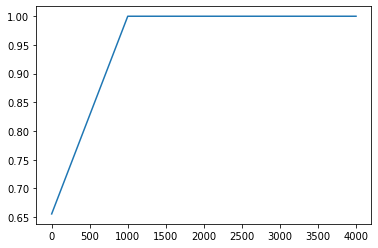

In [30]:
plt.plot(lista_de_iteracoes,lista_de_acertos);

# Utilizando para dados não treinados

texto texto texto

#Testando com uma imagem desconhecida da internet

#Considerações Finais

texto texto texto